# Parkinsons disease :

### Importing libraries

In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFClassifier,XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

Importing the dataset:

In [23]:
a=pd.read_csv('parkinsons.csv')

### preprocessing

In [52]:
print(a.shape)
print(a.head())

(195, 24)
             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0  

In [25]:
a.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

The first five observations of the dataset are given below:

In [53]:
a.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

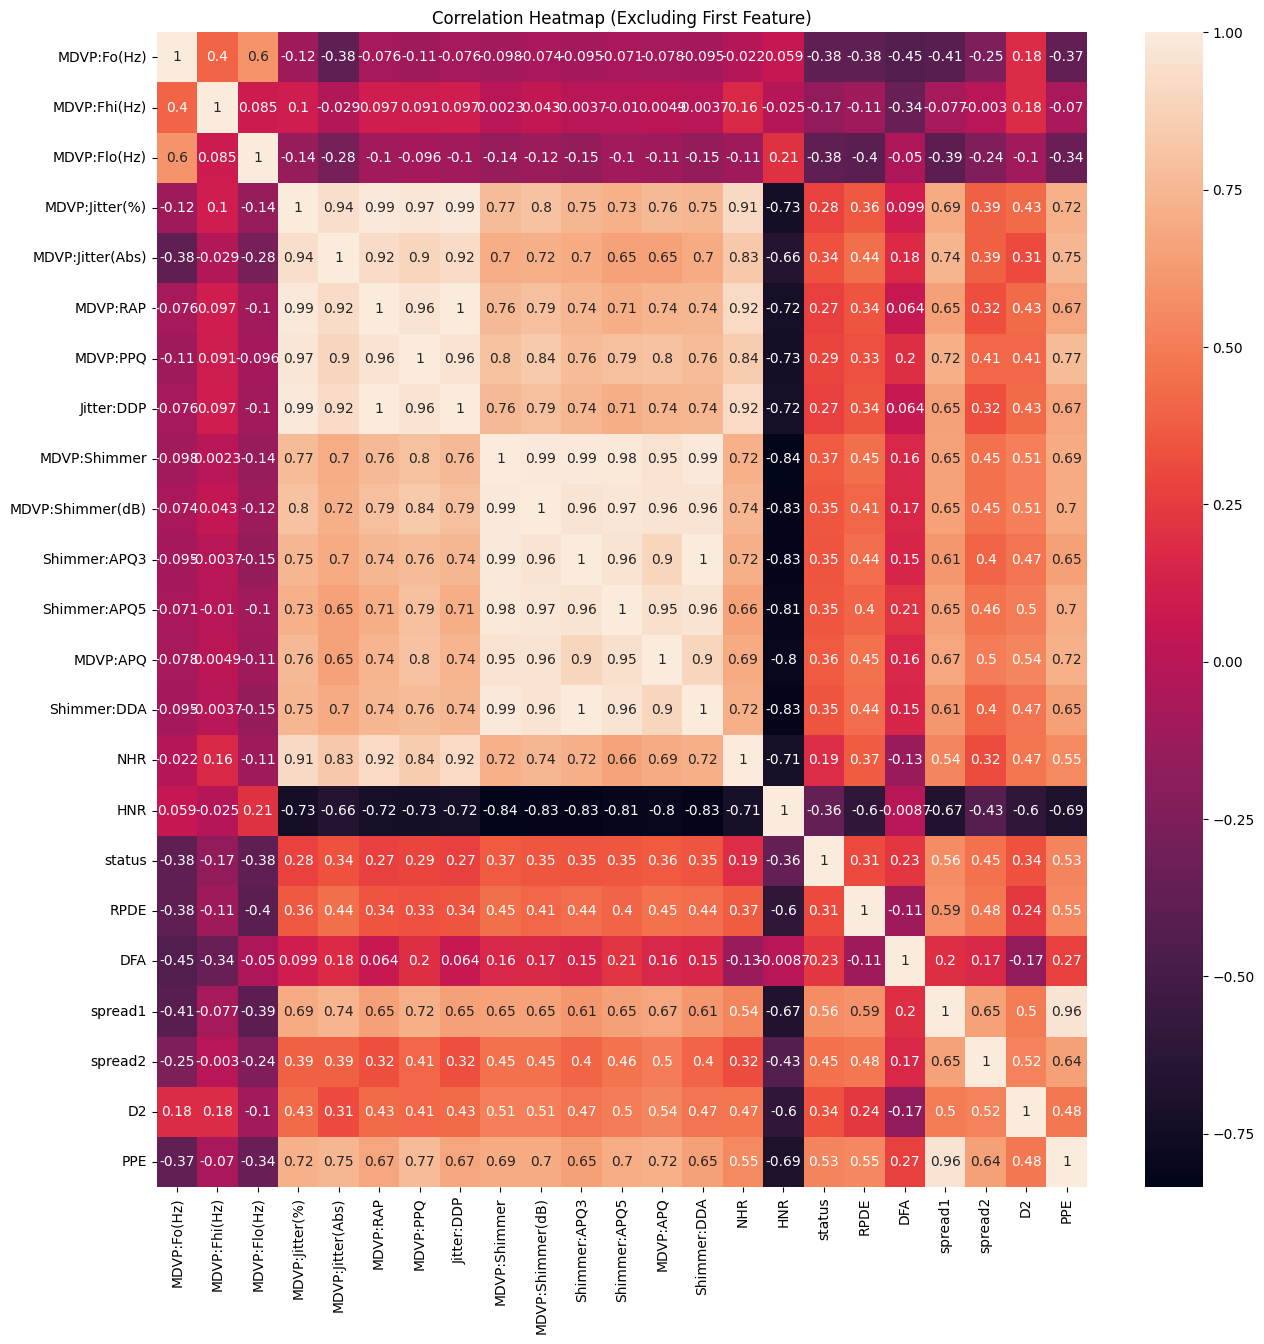

In [56]:
# Drop the first column Name cuz it's a string
correlation = a.iloc[:, 1:].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation, annot=True)
plt.title('Correlation Heatmap')
plt.show()

### EDA:

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


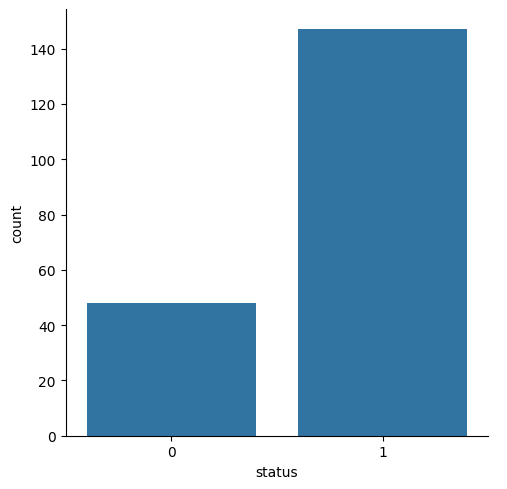

In [27]:
sns.catplot(x='status',kind='count',data=a)

The boxplot shown below helps in identifying the difference in values with respect to the 'status' of the patient.

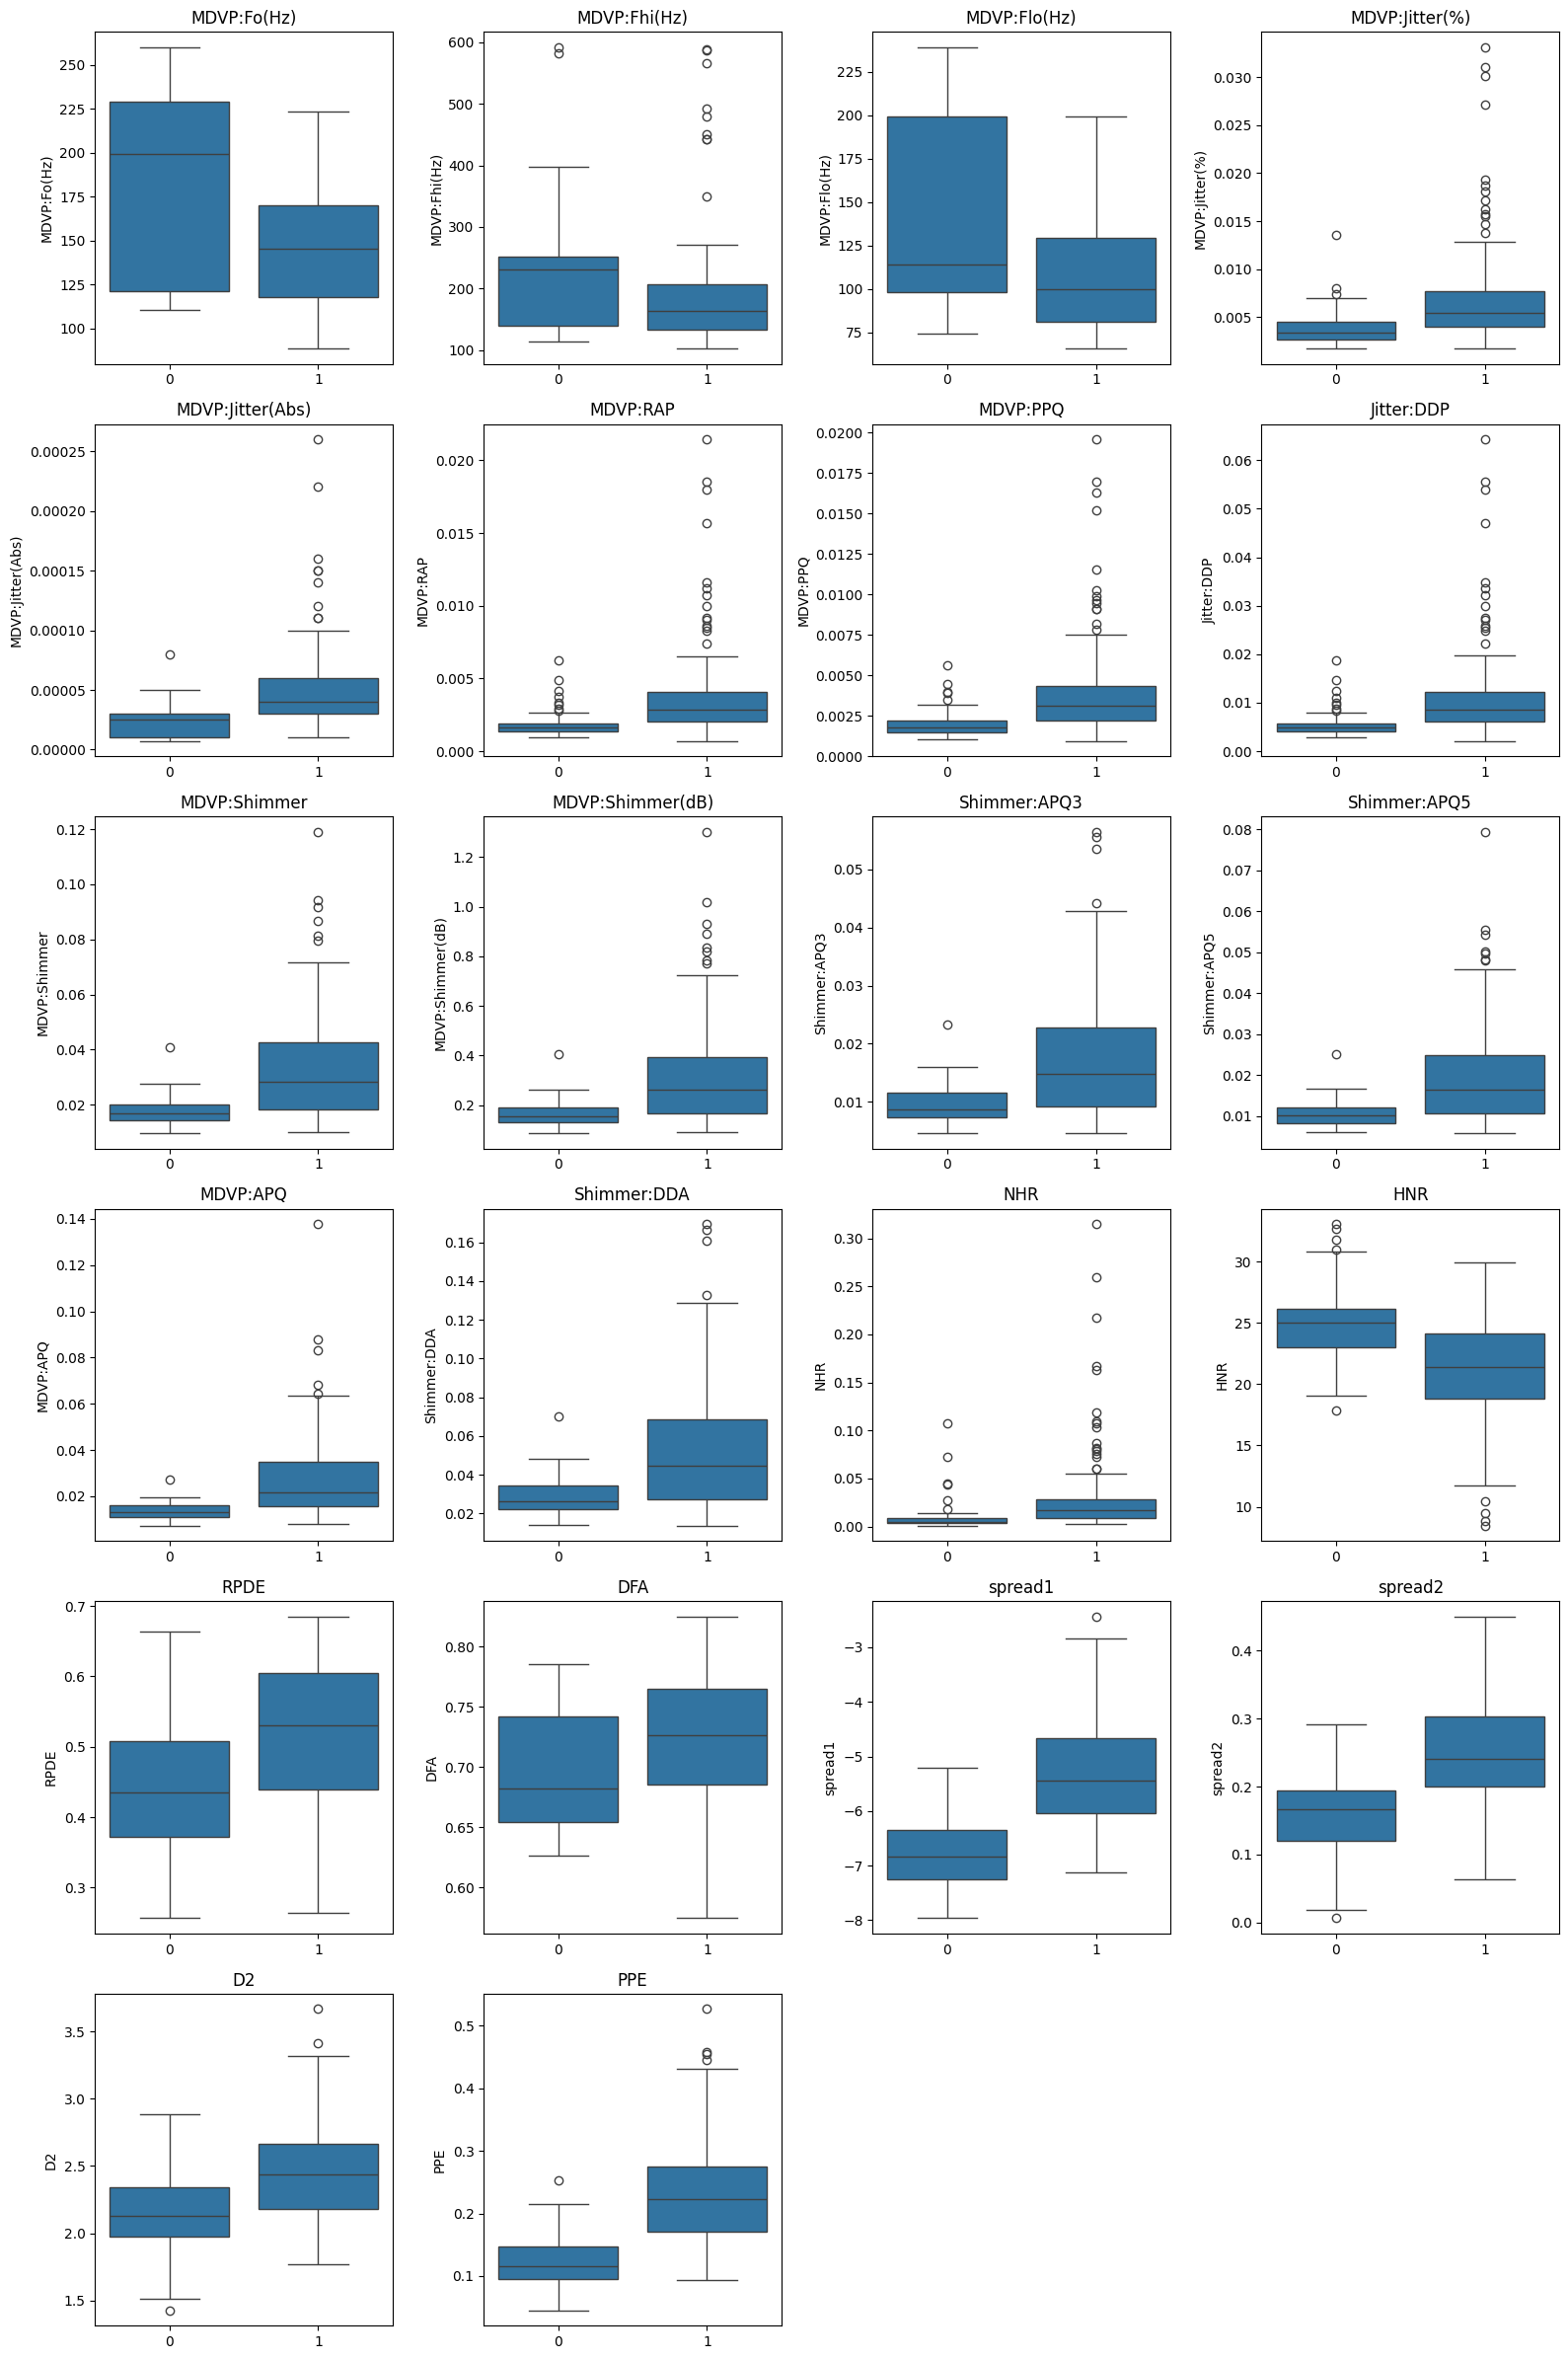

In [49]:

# Set up the Matplotlib figure with subplots
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(16, 24))  # 6 rows, 4 columns

# Flatten axes array for easier iteration
axes = axes.flatten()

# Iterate over columns and plot each visualization
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x='status', y=col, data=a, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')  # Remove x-axis label for better layout

# Hide empty subplots
for ax in axes[len(columns_to_plot):]:
    ax.axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


From the boxplot shown above it is very evident that if a patient has a lower rate of 'HNR','MDVP:Flo(Hz)','MDVP:Fhi(Hz)','MDVP:Fo(Hz)' ,then he/she is affected by parkinsons disease.

### Feature Engineering

In [29]:
b=a.drop(['name'],axis=1)

In [30]:
features=a.drop(['status','name'],axis=1)
labels=a['status']

### Normalisation

In [31]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

### Splitting of dataset:

In [32]:

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=5)

### Cross validation:

In [34]:
lr=cross_val_score(LogisticRegression(),x_train,y_train)
xgbc=cross_val_score(XGBRFClassifier(),x_train,y_train)
xgb=cross_val_score(XGBClassifier(),x_train,y_train)
svm=cross_val_score(SVC(),x_train,y_train)
#nb=cross_val_score(MultinomialNB(),x_train,y_train)
dtc=cross_val_score(DecisionTreeClassifier(),x_train,y_train)
adb=cross_val_score(AdaBoostClassifier(),x_train,y_train)
bbc=cross_val_score(BaggingClassifier(),x_train,y_train)
etc=cross_val_score(ExtraTreesClassifier(),x_train,y_train)
gbc=cross_val_score(GradientBoostingClassifier(),x_train,y_train)
rfc=cross_val_score(RandomForestClassifier(),x_train,y_train)
#vc=cross_val_score(VotingClassifier(estimators),x_train,y_train)

In [35]:
print('log reg',lr,lr.mean())
print('xgbd',xgbc,xgbc.mean())
print('xgb',xgb,xgb.mean())
print('svm',svm,svm.mean())
#print('nb',nb,nb.mean)
print('dtc',dtc,dtc.mean())
print('adb',adb,adb.mean())
print('bbc',bbc,bbc.mean())
print('etc',etc,etc.mean())
print('gbc',gbc,gbc.mean())
print('rfc',rfc,rfc.mean())
#print('vc',vc,vc.mean)

log reg [0.90625    0.90322581 0.87096774 0.83870968 0.80645161] 0.8651209677419356
xgbd [0.90625    0.93548387 0.87096774 0.96774194 0.80645161] 0.8973790322580646
xgb [0.875      0.93548387 0.83870968 0.96774194 0.87096774] 0.8975806451612904
svm [0.90625    0.90322581 0.87096774 0.87096774 0.87096774] 0.884475806451613
dtc [0.84375    0.87096774 0.83870968 0.90322581 0.93548387] 0.8784274193548388
adb [0.9375     0.87096774 0.90322581 0.93548387 0.83870968] 0.8971774193548387
bbc [0.90625    0.90322581 0.87096774 0.90322581 0.87096774] 0.8909274193548388
etc [0.96875    0.96774194 0.87096774 0.90322581 0.87096774] 0.9163306451612904
gbc [0.90625    0.93548387 0.87096774 0.96774194 0.90322581] 0.916733870967742
rfc [0.90625    0.96774194 0.90322581 0.93548387 0.87096774] 0.916733870967742


All the cross valildation scores of various algorithms are shown above.
Here the xgboost and the extra tree classifier algorithms  has a high rate of accuracy of 89% and 91% respectively,hence we will use both these algorithms to fit two models and find the best model out of them.

# XGboost:

First a model is fit using the xgboost algorithm(no parameter tuning is done).

In [36]:
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [77]:
# Predictions on the training set
y_pred_train_xgb = model.predict(x_train)

# Predictions on the test set
y_pred_test_xgb = model.predict(x_test)

# Calculate accuracy scores
accuracy_train_xgb = accuracy_score(y_train, y_pred_train_xgb)
accuracy_test_xgb = accuracy_score(y_test, y_pred_test_xgb)

# Print accuracies
print("Accuracy of Train: " + str(accuracy_train_xgb * 100) + "%")
print("Accuracy of Test: " + str(accuracy_test_xgb * 100) + "%")

Accuracy of Train: 100.0%
Accuracy of Test: 89.74358974358975%


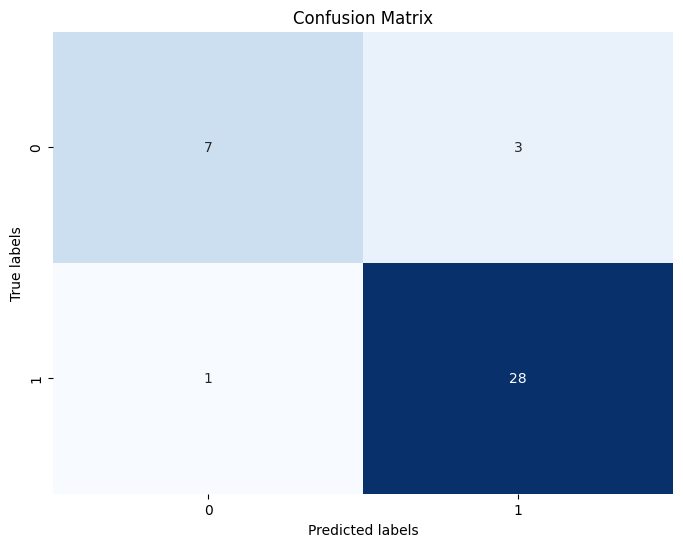

In [78]:
cm = confusion_matrix(y_test, y_pred_test_xgb)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Extra trees classifier:

Here the extratrees classifier algorithm is used to fit a model(no parameter tuning is done):

In [39]:
model=ExtraTreesClassifier()
model.fit(x_train,y_train)

ExtraTreesClassifier()

In [80]:
# Predictions on the test set
y_pred_test_etc = model.predict(x_test)
accuracy_test_etc = accuracy_score(y_test, y_pred_test_etc)
y_pred_train_etc = model.predict(x_train)
accuracy_train_etc = accuracy_score(y_train, y_pred_train_etc)

print("Accuracy on Test Set: {:.2f}%".format(accuracy_test_etc * 100))
print("Accuracy on Train Set: {:.2f}%".format(accuracy_train_etc * 100))

Accuracy on Test Set: 89.74%
Accuracy on Train Set: 100.00%


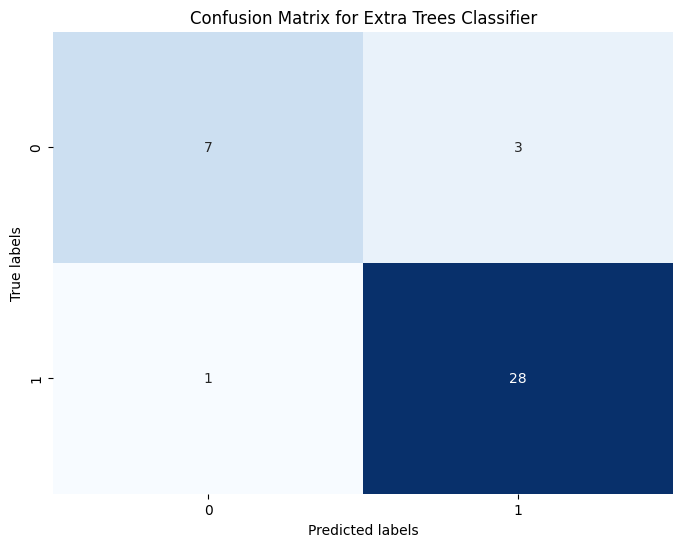

In [82]:
cm_etc = confusion_matrix(y_test, y_pred_test_etc)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_etc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Extra Trees Classifier')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### Comparaison

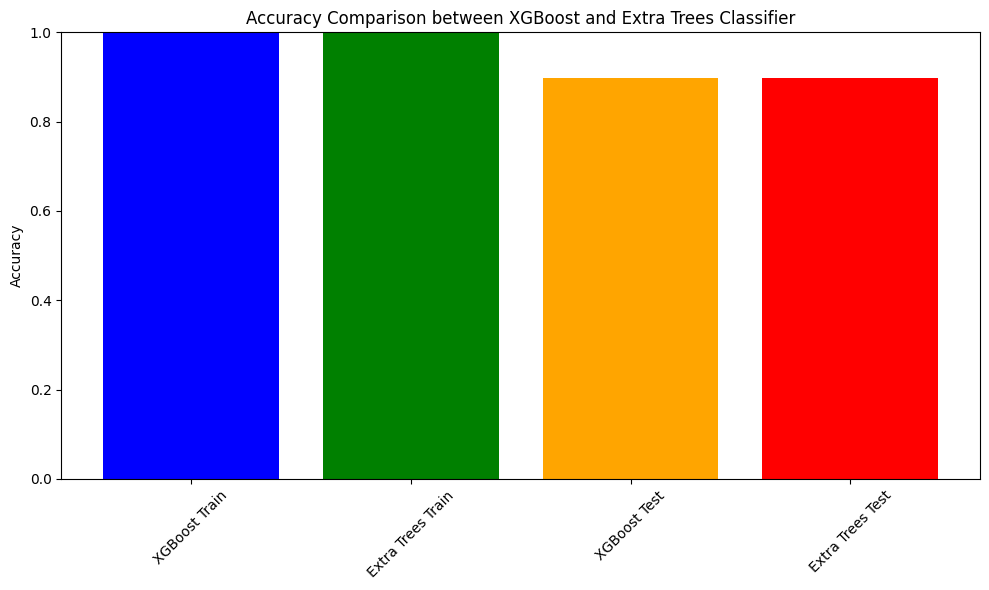

In [75]:
# Labels for the bars
labels = ['XGBoost Train', 'Extra Trees Train', 'XGBoost Test', 'Extra Trees Test']

# Accuracy scores
accuracy_scores = [accuracy_train_xgb,accuracy_train_etc, accuracy_test_xgb, accuracy_test_etc]

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, accuracy_scores, color=['blue', 'green', 'orange', 'red'])
plt.title('Accuracy Comparison between XGBoost and Extra Trees Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Limit y-axis to 0-1 for percentage
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Comparing the xgboost algorithm , the extra trees classifier has a better accuracy. In this model the rate of accuracy for the test data is 97% hence this model is the best suited for this dataset.

In [84]:
print("ETC")
print(classification_report(y_test,y_pred_test_etc))
print("XGB")
print(classification_report(y_test,y_pred_test_xgb))


ETC
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.90      0.97      0.93        29

    accuracy                           0.90        39
   macro avg       0.89      0.83      0.86        39
weighted avg       0.90      0.90      0.89        39

XGB
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.90      0.97      0.93        29

    accuracy                           0.90        39
   macro avg       0.89      0.83      0.86        39
weighted avg       0.90      0.90      0.89        39



The classification report shown above says that the model has predicted 100% for patients who are not having parkinsons disease and a accuuracy of 97% for person's who are having parkinsons disease.
Also the confusion matrix shown above shows that only one value has been mis-classified.